In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()     #To work with date time data

In [5]:
data = pd.read_csv("E:\\2020\\Quarantine\\Python\\bike_sharing_daily.csv", index_col=0)
data.head()
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'].head()

instant
1   2011-01-01
2   2011-01-02
3   2011-01-03
4   2011-01-04
5   2011-01-05
Name: dteday, dtype: datetime64[ns]

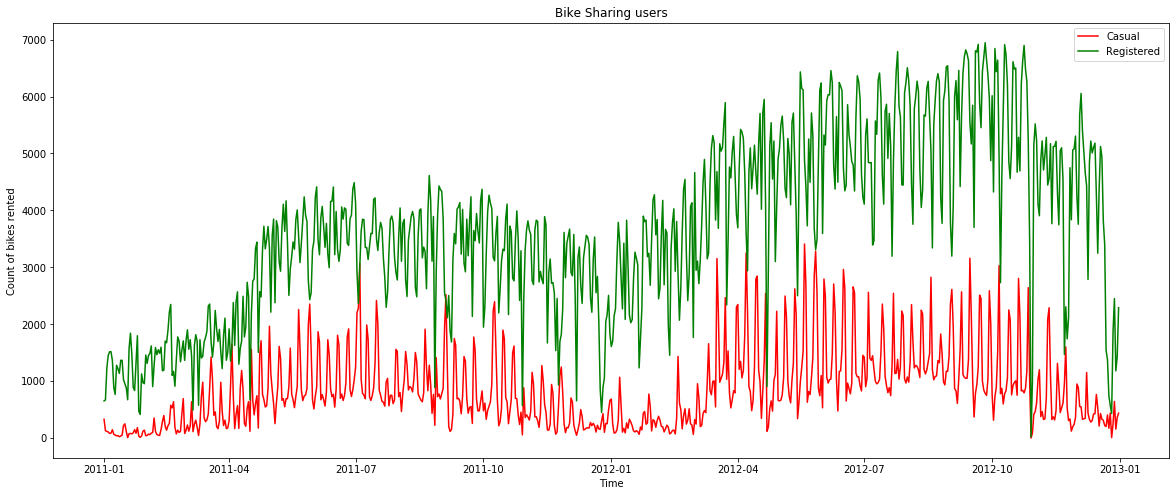

In [11]:
plt.figure(figsize=(20,8))

plt.plot(data['dteday'], data['casual'], color = 'r', label='Casual')
plt.plot(data['dteday'], data['registered'], color = 'g', label='Registered')

plt.legend()
plt.title('Bike Sharing users')
plt.xlabel('Time')
plt.ylabel('Count of bikes rented')

plt.show()

In [15]:
#Visualising wrt Year

data.head()
year_df = data.groupby('yr', as_index = False).mean()
year_df

,yr,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,2.498630,6.526027,0.027397,3.008219,0.684932,1.421918,0.486665,0.466835,0.643665,0.191403,677.402740,2728.358904,3405.761644
1,1,2.494536,6.513661,0.030055,2.986339,0.683060,1.368852,0.504081,0.481852,0.612166,0.189572,1018.483607,4581.450820,5599.934426


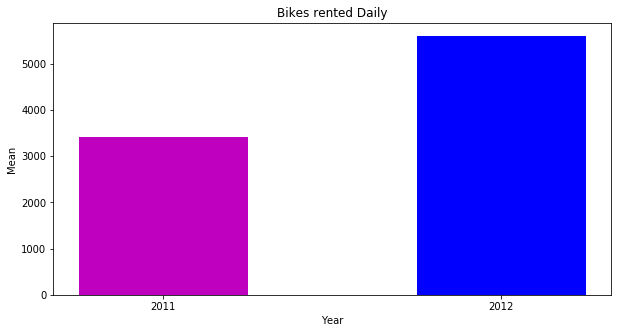

In [24]:
plt.figure(figsize=(10,5))

plt.bar(year_df['yr'],year_df['cnt'], color=['m','b'], width=0.5 )
plt.xticks([0,1],[2011,2012])
plt.xlabel('Year')
plt.ylabel('Mean')
plt.title('Bikes rented Daily')#Since mean kra  h average h

plt.show()

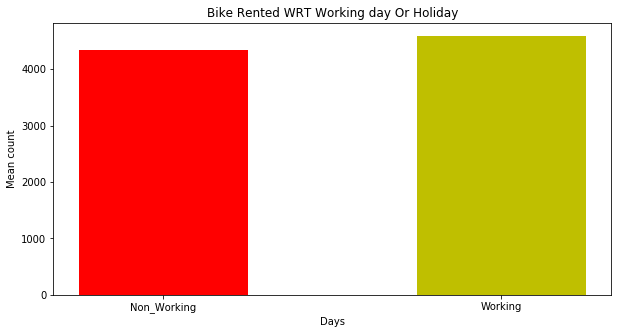

In [35]:
#Visualising wrt Working Days

days = data.groupby('workingday', as_index=False).mean()
#days.head()

plt.figure(figsize=(10,5))
plt.bar(days['workingday'], days['cnt'], color=['r','y'], width = 0.5)

plt.xlabel('Days')
plt.ylabel('Mean count')
plt.xticks([0,1], ['Non_Working','Working'])
plt.title('Bike Rented WRT Working day Or Holiday')

plt.show()

Text(0.5, 1.0, 'Bikes Shared Each Month')

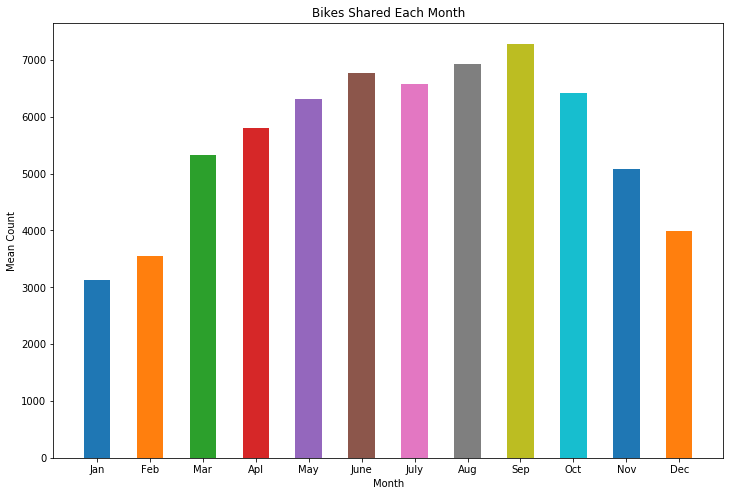

In [50]:
#Visualizing by taking 1 year and then Visualizing wrt each month

year_data_1 = data.loc[data['yr'] == 1]  #For year 2012

month_df = year_data_1.groupby('mnth', as_index=False).mean()

month_df['mnth'].replace([1,2,3,4,5,6,7,8,9,10,11,12], 
                         ['Jan','Feb','Mar','Apl','May','June','July','Aug','Sep','Oct','Nov','Dec'],
                        inplace=True)

plt.figure(figsize=(12,8))
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11']

plt.bar(month_df['mnth'], month_df['cnt'], width=0.5, color = colors)
plt.xlabel('Month')
plt.ylabel('Mean Count')
plt.title('Bikes Shared Each Month')

In [2]:
#Visualizing using boxPlot

data[['registered','casual']].boxplot(figsize=(12,8))

#columns = ['registered', 'casual']

NameError: name 'data' is not defined

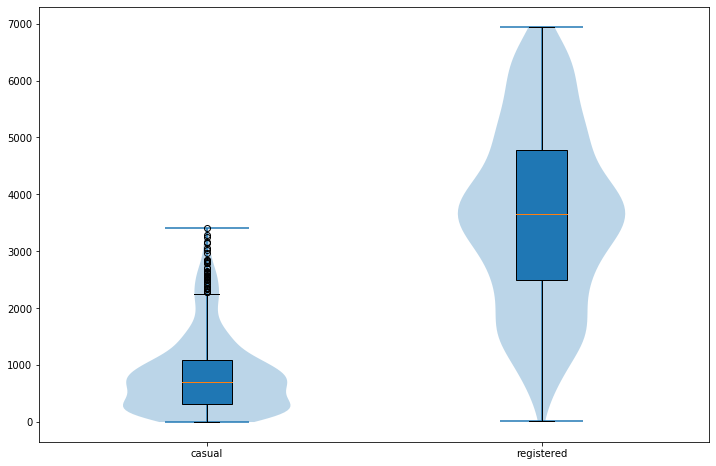

In [10]:
selected_data = data[['casual','registered']]
selected_data.head()
columns = selected_data.columns
selected_data_array = selected_data.values
selected_data_array

colors = ['g', 'm']

plt.figure(figsize=(12,8))
bp = plt.boxplot(selected_data_array, 
                patch_artist=True,
                labels=columns)

vp = plt.violinplot(selected_data_array)  #we can see the kde(probability distribution curve) about the line


In [27]:
#Visulasising Season 

season_data = data[['season','cnt']]
season_data = season_data.groupby('season',as_index=False).sum()
season_data
season_data = season_data['season'].replace([1,2,3,4],['Spring','Summer', 'Fall', 'Winter'], inplace=True)
season_data

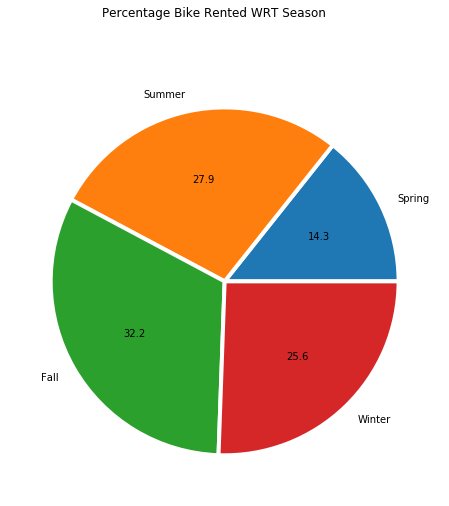

([<matplotlib.patches.Wedge at 0x15433abb388>,
 [Text(1.1707395540859533, 0.5651273276869765, 'Spring'),
  Text(-0.22401280742825846, 1.076948588423844, 'Summer'),
  Text(-0.9528670641774118, -0.5495856239076129, 'Fall'),
  Text(0.7640105179336124, -0.7913835533335358, 'Winter')],
 [Text(0.7204551102067405, 0.34777066319198546, '14.3'),
  Text(-0.12218880405177732, 0.5874265027766421, '27.9'),
  Text(-0.5197456713694973, -0.2997739766768797, '32.2'),
  Text(0.41673300978197036, -0.4316637563637468, '25.6')])

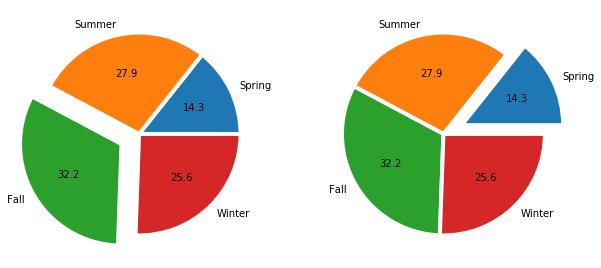

In [69]:
season_data = data[['season','cnt']]
group_season_data = season_data.groupby('season', as_index=False).sum()
group_season_data['season'].replace([1,2,3,4],
                                     ['Spring','Summer', 'Fall', 'Winter'], 
                                     inplace=True)

plt.figure(figsize=(12,8))
plt.pie(group_season_data['cnt'],
        labels = group_season_data['season'],
        autopct='%.1f',
        wedgeprops={'linewidth': 4,
                 'edgecolor': "white"})
plt.suptitle('Percentage Bike Rented WRT Season')
plt.show()

#explode the max and min fig

explode_max =(0,0,0.2,0) #tuple with Fall beign max 
explode_min = (0.2,0,0,0) #min tuple

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))

ax1.pie(group_season_data['cnt'],labels = group_season_data['season'],
        autopct='%.1f',wedgeprops={'linewidth': 4,'edgecolor': "white"},
       explode= explode_max)

ax2.pie(group_season_data['cnt'],labels = group_season_data['season'],
        autopct='%.1f',wedgeprops={'linewidth': 4,'edgecolor': "white"},
       explode= explode_min)

pandas.core.frame.DataFrame

,season,cnt
0,Spring,471348
1,Summer,918589
2,Fall,1061129
3,Winter,841613
